In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../src/notebook_env.py


---------------------------------
Working on the host: unknownA07817A930E2

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


# Die Stichprobenverteilung

**Importiere Module**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Ausgehend von unserer Intuition der Zufälligkeit im Stichprobenprozess führen wir die **<a href="https://en.wikipedia.org/wiki/Sampling_distribution">Stichprobenverteilung</a>** ein. Die Stichprobenverteilung ist eine Verteilung einer Stichprobenstatistik *(Lovirc 2010)*. Oft wird der Name der berechneten Statistik als Teil des Titels hinzugefügt. Wenn es sich bei der berechneten Statistik beispielsweise um den Stichprobenmittelwert handelt, würde die Stichprobenverteilung den Titel **Stichprobenverteilung des Stichprobenmittelwerts** tragen.

Erinnern wir uns an das einfache Beispiel aus dem vorigen Abschnitt, bei dem die Grundgesamtheit durch die ersten $100$ ganzen Zahlen $\{ 1,2,3,\dots,100 \}$ repräsentiert wurde. Wenn wir wiederholt Stichproben aus dieser Grundgesamtheit ziehen und jedes Mal die Stichprobenstatistik (z. B. $\bar{x}$ oder $s$,...) berechnen, wird **die resultierende Verteilung der Stichprobenstatistik als Stichprobenverteilung dieser Statistik** bezeichnet.

Aus dieser Grundgesamtheit nehmen wir wiederholt Zufallsstichproben $(x)$ ohne Ersetzung mit der Größe $n=30$. Die Zufallsstichproben könnten Mengen erzeugen, die wie folgt aussehen :

$$\{19, 79, 33, 38, 14, 67, 7, 9, 12, 27, 4, 89, 34, 77, 78, 32, 65, 10, 84, 64, 90, 55, 88, 56, 11, 80, 15, 5, 91, 54\}$$

oder

$$\{43, 52, 56, 8, 65, 60, 46, 15, 64, 19, 82, 91, 88, 1, 5, 9, 4, 92, 67, 36, 72, 31, 50, 96, 87, 6, 93, 84, 78, 16\}$$

... etc.

Für jede Stichprobe berechnen wir eine Stichprobenstatistik. In diesem Beispiel nehmen wir den Mittelwert, $\bar{x}$, jeder Stichprobe. Beachten Sie jedoch, dass es sich bei der Stichprobenstatistik um eine beliebige deskriptive Statistik handeln kann, z. B. um den Median, die Standardabweichung, einen Anteil usw. Sobald wir die Stichprobenmittelwerte für alle Stichproben erhalten haben, listen wir alle ihre verschiedenen Werte und die Anzahl ihres Auftretens (Häufigkeiten) auf, um relative Häufigkeiten oder **empirische Wahrscheinlichkeiten** zu erhalten.

In [3]:
def dot_diagram(dataset, ax=None, min_max=(30, 70)):
    """Function to compute a dotplot.
    Inspried by https://stackoverflow.com/a/66398730"""

    values, counts = np.unique(dataset, return_counts=True)
    data_range = max(values) - min(values)
    # fig_width = data_range / 2 if data_range < 30 else 15
    fig_width = 16
    fig_height = max(counts) / 3 if data_range < 50 else max(counts) / 4
    marker_size = 5
    if ax is None:
        fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    for value, count in zip(values, counts):
        ax.plot(
            [value] * count,
            list(range(count)),
            marker="o",
            color="tab:blue",
            markersize=marker_size,
            linestyle="",
        )
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.yaxis.set_visible(False)
    # ax.set_ylim(-1, max(counts))
    ax.set_ylim(-1, 18)
    ax.set_xticks(range(min_max[0], min_max[1] + 1, 5))
    ax.set_xlim(min_max[0] - 1, min_max[1] + 1)
    ax.tick_params(axis="x", length=0, pad=10)

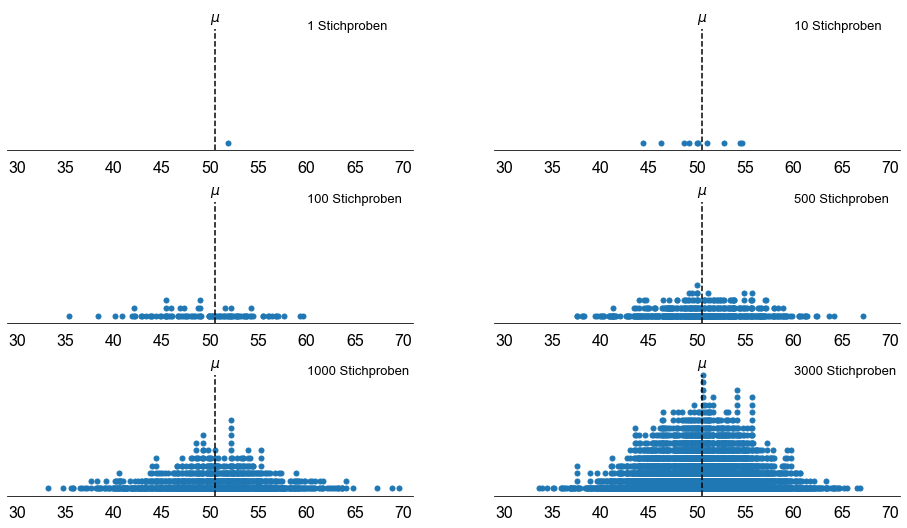

In [4]:
population = list(range(1, 101))
mean_pop = np.mean(population)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 9))
_axes = np.ravel(axes)
trials = [1, 10, 100, 500, 1000, 3000]
SAMPLE_SIZE = 30
np.random.seed(42)

for e, trial in enumerate(trials):
    sample_statistic = []
    for n in range(trial):
        sample = np.random.choice(population, size=SAMPLE_SIZE)
        mean_sample = np.mean(sample)
        sample_statistic.append(mean_sample)
    dot_diagram(sample_statistic, ax=_axes[e])
    _axes[e].text(x=60, y=15, s=f"{trials[e]} Stichproben", size=13)
    _axes[e].text(x=mean_pop, y=16, s=f"$\mu$", size=14, ha="center")
    _axes[e].vlines(x=mean_pop, ymin=-1, ymax=15, color="k", linestyle="dashed")

Je häufiger wir eine Stichprobe nehmen, desto besser nähert sich die relative Häufigkeitsverteilung der Stichprobenstatistik der Stichprobenverteilung an. Mit anderen Worten: Wenn die Anzahl der Stichproben gegen unendlich geht, nähert sich die resultierende Häufigkeitsverteilung der Stichprobenverteilung an. **Die Stichprobenverteilung einer Statistik** ist eine Wahrscheinlichkeitsverteilung dieser Statistik, die aus allen möglichen Stichproben mit demselben Umfang aus der Grundgesamtheit abgeleitet wird. Die Stichprobenverteilung sollte jedoch nicht mit einer Stichprobenverteilung verwechselt werden: Letztere beschreibt die Verteilung der Werte (Elemente) in einer bestimmten Stichprobe.